In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd

In [16]:

# Set seed for reproducibility


# Parameters
start_year = 2000
end_year = 2020
initial_population = 100000
final_population = 500000
years = np.arange(start_year, end_year + 1)

# Generating a linearly increasing population
population = np.linspace(initial_population, final_population, num=len(years))

# Introducing some randomness to the population growth
population_numbers = np.random.normal(loc=population, scale=population*0.01)  # 1% standard deviation
population_numbers = np.round(population_numbers).astype(int)



#this isn't the real data, the data has been generated as an example
prof = np.array([207677, 519092, 596490,  55985, 611469, 178818,  74401, 949396,
                 965975, 810313, 311567, 106695, 687390, 445750, 130817, 500225,
                 44044, 910227, 266192, 665897, 318593])


popul = np.sort(population_numbers)
profit = np.sort(prof)


data = {
    'Year': years,
    'Population': popul,
    'Profit': profit
}

df = pd.DataFrame(data)


print(df)

    Year  Population  Profit
0   2000       99774   44044
1   2001      120081   55985
2   2002      138005   74401
3   2003      159129  106695
4   2004      180200  130817
5   2005      197698  178818
6   2006      220827  207677
7   2007      238558  266192
8   2008      259242  311567
9   2009      278315  318593
10  2010      305557  445750
11  2011      319957  500225
12  2012      336404  519092
13  2013      362961  596490
14  2014      375361  611469
15  2015      400835  665897
16  2016      411769  687390
17  2017      434156  810313
18  2018      460906  910227
19  2019      483545  949396
20  2020      500857  965975


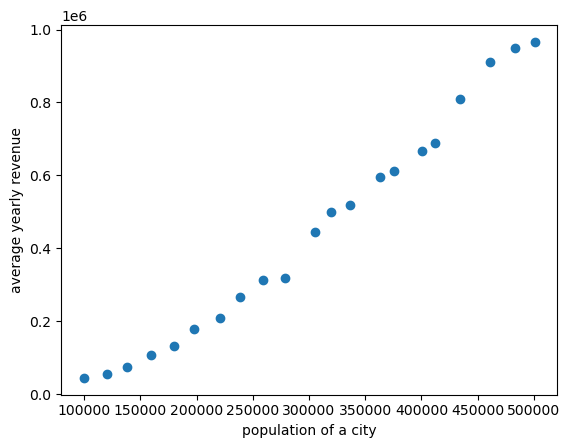

In [17]:
plt.scatter(popul, profit)
plt.xlabel("population of a city")
plt.ylabel("average yearly revenue")
plt.show()

In [18]:
def cf(x, y, w, b):
    
    
    a = sum([(((w*x[i] + b))-(y[i]))**2 for i in range(0, len(x))])
    c = a/(2*len(popul))
    return c

cf(popul, profit, 10, 10)

    


3660117890589.2617

In [21]:
def compute_gradient(x, y, w, b):
    deriv_b = lambda a: (w*x[a] + b)-y[a]
    deriv_w = lambda a: ((w*x[a] +b )-y[a])*x[a]
    m = len(x)
    total_deriv_b = 1/m * sum([deriv_b(i) for i in range(0, m) ])
    total_derive_w = 1/m * sum([deriv_w(i) for i in range(0, m)])
    return total_deriv_b, total_derive_w







In [20]:
def grad_desc(x,y,init_w,init_b, compute_gradient, cf, alpha, iteration):
    
    w_his = []
    j_his = []
    grad = []
    w = init_w 
    b = init_b
    CC = True
    
    if CC == True:
        for i in range(iteration):
         
            cost = cf(x,y,w,b)
            j_his.append(cost)
            w_his.append(w)
            dj_db, dj_dw = compute_gradient(x,y,w,b) 
            w = w - alpha*dj_dw
            b = b - (alpha*10**8)*dj_db 
        
        
            grad.append(dj_db)
        
            c = cf(x,y,w,b)
            cc = j_his[len(j_his)-1]/c
            
            
    
    return w, b, j_his


print(grad_desc(popul, profit, 100, -200000, compute_gradient, cf, 1*10**-13, 10000))



(2.283306231730147, -228950.26647426642, [498282568065857.8, 487944937164999.1, 477821776631092.3, 467908636939991.06, 458201160879907.06, 448695081636244.5, 439386220916167.9, 430270487112080.94, 421343873503203.6, 412602456494463.06, 404042393891920.25, 395659923213975.56, 387451360037611.2, 379413096378943.8, 371541599107374.7, 363833408392640.8, 356285136184084.3, 348893464721472.5, 341655145076712.06, 334566995725819.06, 327625901150514.44, 320828810468832.44, 314172736094138.56, 307654752421969.3, 301271994544113.75, 295021656989376.1, 288900992490459.9, 282907310776438.0, 277037977390273.44, 271290412530872.16, 265662089919160.0, 260150535687684.56, 254753327293254.2, 249468092452134.75, 244292508097339.47, 239224299357549.44, 234261238557219.62, 229401144237427.75, 224641880197038.8, 219981354553760.2, 215417518824679.1, 210948367025873.3, 206571934790703.5, 202286298506397.06, 198089574468545.66, 193979918053143.1, 189955522905801.75, 186014620147788.6, 182155477598534.4, 1783



$\text{With initial w = 100, initial b = -3000 --> the error minimzed to 5668403522 -->  w = 1.726464822094373,b =  -34931.164781595406}\newline \text{with initial w = 100, initial b = -200,000 --> the error minimzed to ---> 1261356089 --> w = 2.2852945919324608, b = -229059.23754115656}$

so essentially, because my initial guess of b was too small, the algo found the 'b' that goes towards a local minimum but not the global minimum 

1.725779348728666
-34857.51490700353


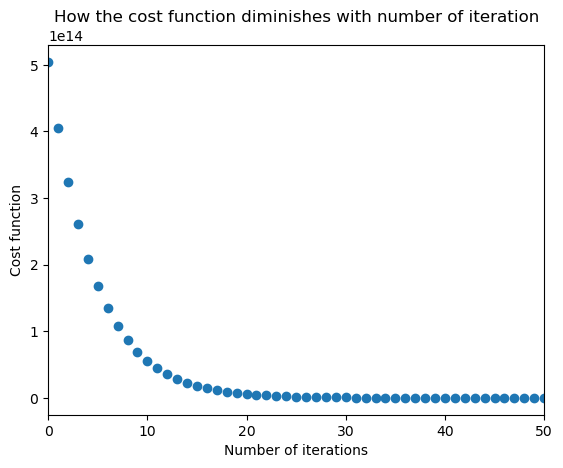

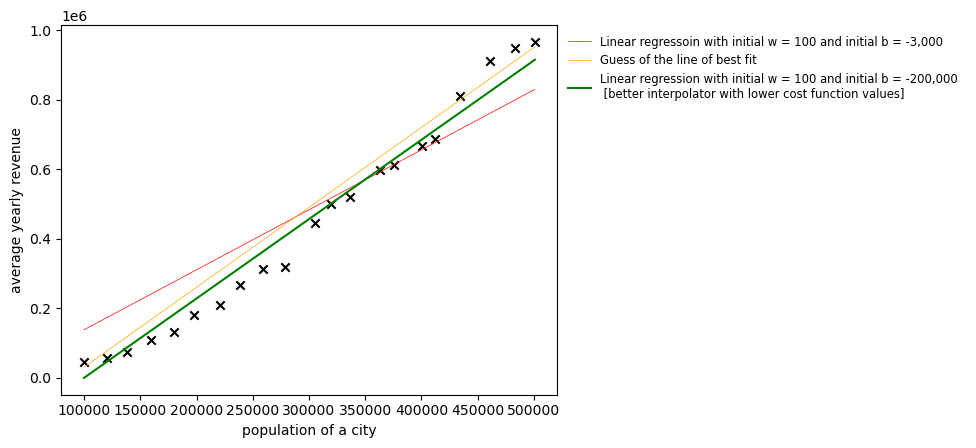

In [30]:
a, b, c = grad_desc(popul, profit, 100, -3000, compute_gradient, cf, 1*10**-12, 1000)
d, e, f = grad_desc(popul, profit, 100, -200000, compute_gradient, cf, 1*10**-13, 10000)


print(a)
print(b)
x = np.arange(len(c))
plt.figure(1)
plt.title('How the cost function diminishes with number of iteration')
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.scatter(x, c)
plt.xlim(0, 50)
plt.show()
plt.figure(2)

pred_y = [x*a + b for x in popul]
pred_iy = [x*2.3 - 200000 for x in popul]
pred_y2 = [x*d + e for x in popul]

plt.scatter(popul, profit, marker = "x", color = "black")
plt.plot(popul, pred_y, color = "red", linewidth = 0.5, label = "Linear regressoin with initial w = 100 and initial b = -3,000")
plt.plot(popul, pred_iy, color = "orange", linewidth = 0.5, label = "Guess of the line of best fit")
plt.plot(popul, pred_y2, color ="green", label = "Linear regression with initial w = 100 and initial b = -200,000 \n [better interpolator with lower cost function values]")
plt.xlabel("population of a city")
plt.ylabel("average yearly revenue")
plt.legend(loc="upper left", fontsize='small', bbox_to_anchor=(1, 1), ncol=1, frameon=False)

plt.show()

#it seems that finding the correct b value seems to be the limiting factor, since the gradient seems to be working fine


